In [ ]:
rmdir /content/drive/MyDrive/Eggs/.ipynb_checkpoints

rmdir: failed to remove '/content/drive/MyDrive/Eggs/.ipynb_checkpoints': No such file or directory


In [ ]:
# rmdir /content/Test_Data/nonviable/.ipynb_checkpoints

In [ ]:
from google.colab import drive
import torch

print(torch.cuda.is_available())
# drive.mount('/content/drive')
drive.mount("/content/drive", force_remount=True)

True
Mounted at /content/drive


# Load and transform data

In [ ]:
from torch.utils.data import Dataset
from os.path import join
from os import listdir

class transformed_data1(Dataset):
  def __init__(self, img, mask):
    self.img = img  #img path
    self.mask = mask  #mask path
    self.len = len(listdir(self.img))

  def __getitem__(self, index):
    ls_img = sorted(listdir(self.img))
    ls_mask = sorted(listdir(self.mask))

    img_file_path = join(self.img, ls_img[index])
    img_tensor = torch.load(img_file_path)

    mask_file_path = join(self.mask, ls_mask[index])
    mask_tensor = torch.load(mask_file_path)

    return img_tensor, mask_tensor

  def __len__(self):
    return self.len

In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from os.path import exists
from os import mkdir

base = '/content/drive/MyDrive/Eggs'
data_dir = base + '/April_Set'
train_dir = data_dir + '/training'
test_dir = data_dir + '/testing'

transform = transforms.Compose([transforms.Resize(255),
                                 transforms.CenterCrop(224),
                                 transforms.ToTensor(),
                                 transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                                #  transforms.RandomInvert(),
                                #  transforms.RandomRotation(30),
                                # transforms.RandomCrop(1)
])

importing_tst_data = datasets.ImageFolder(test_dir,
                               transform=transform)
importing_trn_data = datasets.ImageFolder(train_dir,
                               transform=transform)

loader_dir = '/content/loader'
loader_dir =  base + '/loader'
test_loader = loader_dir + '/test_loader'
train_loader = loader_dir + '/train_loader'

if not (exists(test_loader) and exists(train_loader)):
    mkdir(loader_dir)
    mkdir(test_loader)
    mkdir(train_loader)
    mkdir(test_loader + '/img')
    mkdir(test_loader + '/mask')
    mkdir(train_loader + '/img')
    mkdir(train_loader + '/mask')

    testing_tensors = []
    training_tensors = []
    print("Test: ", end="")
    for i, data in enumerate(importing_tst_data):
        if not (i+1)%round(len(importing_tst_data)/10,0): print(f"{round(100*(i+1)/len(importing_tst_data),0)}%", end=" ")
        torch.save(data[0], test_loader + '/img/test_transformed_img{}'.format(i))
        torch.save(data[1], test_loader + '/mask/test_transformed_mask{}'.format(i))
        testing_tensors.append(data)
    print("Done")
    print("Train: ", end="")
    for i, data in enumerate(importing_trn_data):
        if not (i+1)%round(len(importing_trn_data)/10,0): print(f"{round(100*(i+1)/len(importing_trn_data),0)}%", end=" ")
        torch.save(data[0], train_loader + '/img/train_transformed_img{}'.format(i))
        torch.save(data[1], train_loader + '/mask/train_transformed_mask{}'.format(i))
        training_tensors.append(data)
    print("Training Done")
else:
    importing_tst_data = transformed_data1(test_loader + '/img', test_loader + '/mask')
    importing_trn_data = transformed_data1(train_loader + '/img', train_loader + '/mask')

    testing_tensors = []
    training_tensors = []
    print("Test: ", end="")
    for i, data in enumerate(importing_tst_data):
        if not (i+1)%round(len(importing_tst_data)/10,0): print(f"{round(100*(i+1)/len(importing_tst_data),0)}%", end=" ")
        testing_tensors.append(data)
    print("Done")
    print("Train: ", end="")
    for i, data in enumerate(importing_trn_data):
        if not (i+1)%round(len(importing_trn_data)/10,0): print(f"{round(100*(i+1)/len(importing_trn_data),0)}%", end=" ")
        training_tensors.append(data)
    print("Done")


print(len(testing_tensors))
print(len(training_tensors))

Test: 10.0% 20.0% 30.0% 40.0% 50.0% 60.0% 70.0% 79.0% 89.0% 99.0% Done
Train: 10.0% 20.0% 30.0% 40.0% 50.0% 60.0% 70.0% 80.0% 90.0% Done
614
2375


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
transform = transforms.Compose([transforms.Resize(255),
                                 transforms.CenterCrop(224),
                                 transforms.ToTensor(),
                                 transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])
trn_data = datasets.ImageFolder(train_dir,
                               transform=transform)

In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from os.path import exists

testing_directory = "/content/drive/MyDrive/Eggs/Test Set (Dec 2022)/Test Set (Dec 2022)"
# testing_directory = "/content/drive/MyDrive/Eggs/Another_Test_Set"
# testing_directory = "/content/drive/MyDrive/Eggs/3-4  Testset"
# testing_directory = "/content/drive/MyDrive/Eggs/April 2023 Images"
if exists(testing_directory):
    transform = transforms.Compose([transforms.Resize(255),
                                 transforms.CenterCrop(224),
                                 transforms.ToTensor(),
                                 transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])
    importing_tst_data = datasets.ImageFolder(testing_directory,
                               transform=transform)
    # training_tensors = []
    testing_tensors2 = []
    print("Test: ", end="")
    for i, data in enumerate(importing_tst_data):
        if not (i+1)%round(len(importing_tst_data)/10,0): print(f"{round(100*(i+1)/len(importing_tst_data),0)}%", end=" ")
        testing_tensors2.append(data)
    print("Done")

Test: 11.0% 22.0% 33.0% 44.0% 56.0% 67.0% 78.0% 89.0% 100.0% Done


In [ ]:
# prev_test_tensors = testing_tensors.copy()
# testing_tensors.extend(testing_tensors2)

# Initialize Data Loaders

In [ ]:
from torch.utils.data import Dataset

class transformed_data(Dataset):
  def __init__(self, arr):
    self.arr = arr
    self.len = len(arr)

  def __getitem__(self, index):
    return self.arr[index][0], self.arr[index][1]

  def __len__(self):
    return self.len

In [ ]:
tst_data = transformed_data(testing_tensors)
trn_data = transformed_data(training_tensors)
tst2_data = transformed_data(testing_tensors2)

print(tst_data.__len__())
print(trn_data.__len__())
print(tst2_data.__len__())

NameError: ignored

In [ ]:
from torch.utils.data import DataLoader

batch_size = 27
classes = ['nonviable', 'viable']
number_of_labels = len(classes)

trn_loader = DataLoader(trn_data,
                        batch_size=batch_size,
                        shuffle=True,
                        pin_memory=True,
                        pin_memory_device="cuda:0",
                        num_workers=2,
                        persistent_workers=True)
tst_loader = DataLoader(tst_data,
                        batch_size=batch_size,
                        shuffle=True,
                        pin_memory=True,
                        pin_memory_device="cuda:0",
                        num_workers=2,
                        persistent_workers=True)

tst2_loader = DataLoader(tst2_data,
                        batch_size=batch_size,
                        shuffle=False,
                        pin_memory=True,
                        pin_memory_device="cuda:0",
                        num_workers=2,
                        persistent_workers=True)

print("Train: The number of batches per epoch is: ", len(trn_loader))
print("Test: The number of batches per epoch is: ", len(tst_loader))
print("Test2: The number of batches per epoch is: ", len(tst2_loader))

Train: The number of batches per epoch is:  88
Test: The number of batches per epoch is:  23
Test2: The number of batches per epoch is:  1


In [ ]:
from PIL import ImageFile, Image
from sys import getsizeof
ImageFile.LOAD_TRUNCATED_IMAGES = True

data_iter = iter(trn_loader)

next_batch = next(data_iter) # start loading the first batch
next_batch = [ _.cuda(non_blocking=True) for _ in next_batch ]  # with pin_memory=True and non_blocking=True, this will copy data to GPU non blockingly

# images, labels = next_batch
# print(getsizeof(images))
# print(images.dim())
# print(labels)
# print(images)

print("testing: ", end="")
for i in range(len(tst_loader)):
    print(i+1, end=" ")
    batch = next_batch
    if i + 2 != len(tst_loader):
        # start copying data of next batch
        next_batch = next(data_iter)
        next_batch = [ _.cuda(non_blocking=True) for _ in next_batch]
print()
data_iter = iter(trn_loader)

next_batch = next(data_iter) # start loading the first batch
next_batch = [ _.cuda(non_blocking=True) for _ in next_batch ]  # with pin_memory=True and non_blocking=True, this will copy data to GPU non blockingly

# images, labels = next_batch
# print(getsizeof(images))
# print(images.dim())
# print(labels)
# print(images)
print("training: ", end="")
for i in range(len(trn_loader)):
    print(i+1, end=" ")
    batch = next_batch
    if i + 2 != len(trn_loader):
        # start copying data of next batch
        next_batch = next(data_iter)
        next_batch = [ _.cuda(non_blocking=True) for _ in next_batch]

testing: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 
training: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 

# Model

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torch.nn.functional as F

from PIL import ImageFile, Image
ImageFile.LOAD_TRUNCATED_IMAGES = True

class Network(nn.Module):
    def __init__(self, num_classes=2):
        super(Network, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=3, out_channels=12, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()

        self.conv2 = nn.Conv2d(in_channels=12, out_channels=12, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()

        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv3 = nn.Conv2d(in_channels=12, out_channels=24, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()

        self.conv4 = nn.Conv2d(in_channels=24, out_channels=24, kernel_size=3, stride=1, padding=1)
        self.relu4 = nn.ReLU()

        self.fc = nn.Linear(in_features=112 * 112 * 24, out_features=num_classes)

    def forward(self, input):
        output = self.conv1(input)
        output = self.relu1(output)

        output = self.conv2(output)
        output = self.relu2(output)

        output = self.pool(output)

        output = self.conv3(output)
        output = self.relu3(output)

        output = self.conv4(output)
        output = self.relu4(output)
        # print(output.shape)
        output = output.view(-1, 112 * 112 * 24)

        output = self.fc(output)

        return output

# Instantiate a neural network model
model = Network()

Transfer learning

https://pytorch.org/vision/stable/models.html

In [ ]:
from torchvision.models import resnet50, ResNet50_Weights

model = resnet50(weights=ResNet50_Weights.DEFAULT)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 63.6MB/s]


In [ ]:
from torch.optim import Adam

# Define the loss function with Classification Cross-Entropy loss and an optimizer with Adam optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=0.00001, weight_decay=0.00001)

# Training and Testing Functions

In [ ]:
from torch.autograd import Variable

# Function to save the model
def saveModel():
    path = "./myFirstModel.pth"
    torch.save(model.state_dict(), path)

# Function to test the model with the test dataset and print the accuracy for the test images
def testAccuracy(loader: DataLoader):

    model.eval()
    accuracy = 0.0
    total = 0.0
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


    with torch.no_grad():
        for data in loader:
            images, labels = data

            images = Variable(images.to(device))
            labels = Variable(labels.to(device))
            # inputs, labels = inputs.cuda(), labels.cuda()
            # run the model on the test set to predict labels
            outputs = model(images)
            # the label with the highest energy will be our prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            accuracy += (predicted == labels).sum().item()

    # compute the accuracy over all test images
    accuracy = (100 * accuracy / total)
    return(accuracy)


# Training function. We simply have to loop over our data iterator and feed the inputs to the network and optimize.
def train(num_epochs, bench_mark = 0):

    best_accuracy = bench_mark
    acc_arr = [[],[]]
    # Define your execution device
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print("The model will be running on", device, "device")
    # Convert model parameters and buffers to CPU or Cuda
    model.to(device)

    for epoch in range(num_epochs):  # loop over the dataset multiple times
        running_loss = 0.0
        running_acc = 0.0

        for i, (images, labels) in enumerate(trn_loader, 0):

            # get the inputs
            images = Variable(images.to(device))
            labels = Variable(labels.to(device))

            # zero the parameter gradients
            optimizer.zero_grad()
            # predict classes using images from the training set
            outputs = model(images)
            # compute the loss based on model output and real labels
            loss = loss_fn(outputs, labels)
            # backpropagate the loss
            loss.backward()
            # adjust parameters based on the calculated gradients
            optimizer.step()

            # Let's print statistics for every 1,000 images
            running_loss += loss.item()     # extract the loss value
            if i % 1000 == 999:
                # print every 1000 (twice per epoch)
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 1000))
                # zero the loss
                running_loss = 0.0

        # Compute and print the average accuracy fo this epoch when tested over all 10000 test images
        accuracy = testAccuracy(tst_loader)
        acc_arr[1].append(testAccuracy(trn_loader))
        acc_arr[0].append(accuracy)

        # we want to save the model if the accuracy is the best
        if accuracy > best_accuracy:
            print('epoch %2d - accuracy: %3d%% - new best' % (epoch+1, accuracy))
            saveModel()
            best_accuracy = accuracy
        elif (epoch+1)%10 == 0:

            print('epoch %2d - accuracy: %3d%%' % (epoch+1, accuracy))
    return acc_arr

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to show the images
def imageshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# Function to test the model with a batch of images and show the labels predictions
def testBatch(model, loader: DataLoader):
    # get batch of images from the test DataLoader
    images, labels = next(iter(loader))

    # show all images as one image grid
    imageshow(torchvision.utils.make_grid(images))
    print('    Indices: ', ' '.join('%9s' % j
                               for j in range(len(labels))))
    # Show the real labels on the screen
    print('Real labels: ', ' '.join('%9s' % classes[labels[j]]
                               for j in range(len(labels))))

    # Let's see what if the model identifiers the  labels of those example
    images, labels = images.cuda(), labels.cuda()
    outputs = model(images)

    # We got the probability for every 10 labels. The highest (max) probability should be correct label
    _, predicted = torch.max(outputs, 1)

    # Let's show the predicted labels on the screen to compare with the real ones
    print('  Predicted: ', ' '.join('%9s' % classes[predicted[j]]
                              for j in range(len(labels))))

# Function to test what classes performed well
def testClasses(loader: DataLoader):
    class_correct = list(0. for i in range(number_of_labels))
    class_total = list(0. for i in range(number_of_labels))
    with torch.no_grad():
        for data in loader:
            images, labels = data
            images, labels = images.cuda(), labels.cuda()
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            c = (predicted == labels).squeeze()
            for i in range(len(predicted)):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1

    for i in range(number_of_labels):
        print('Accuracy of %5s : %2d %%' % (
            classes[i], 100 * class_correct[i] / class_total[i]))
    print('Total Accuracy: %2d %%' % (100*np.sum(class_correct)/np.sum(class_total)))

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
def c_matrix(loader:DataLoader):
    predicted = []
    true = []
    with torch.no_grad():
        for data in loader:
            images, labels = data
            outputs = model(images)
            _, pred = torch.max(outputs, 1)
            predicted.extend(pred.tolist())
            true.extend(labels.tolist())
            # c = (predicted == labels).squeeze()
            # for i in range(len(predicted)):
            #     label = labels[i]
            #     class_correct[label] += c[i].item()
            #     class_total[label] += 1

    return confusion_matrix(true, predicted)


In [ ]:
import torch
import torchvision
import matplotlib.pyplot as plt

def print_wrong(loader:DataLoader):
  # Evaluate the model on the test dataset
  model.eval()
  cur = 0

  with torch.no_grad():
      for images, labels in loader:
          # images, labels = images.cuda(), labels.cuda()
          # Get the predicted class for each image
          outputs = model(images)
          _, predicted = torch.max(outputs, 1)

          # Check which images are misclassified
          mask = predicted != labels

          # If any images are misclassified, save them
          if mask.any():
              misclassified_images = images[mask]
              misclassified_labels = labels[mask]
              misclassified_predictions = predicted[mask]

              for i in range(len(misclassified_images)):
                  img = torchvision.utils.make_grid(misclassified_images[i])
                  img = img.numpy().transpose((1, 2, 0))
                  plt.imshow(img)
                  plt.title('Predicted: {}, Actual: {}'.format(misclassified_predictions[i], misclassified_labels[i]))
                  plt.savefig('misclassified_{}.png'.format(cur))
                  cur+=1

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
def c_matrix(loader:DataLoader):
    y_pred = []
    y_true = []

    # iterate over test data
    for inputs, labels in loader:
            # inputs, labels = inputs.cuda(), labels.cuda()
            output = model(inputs) # Feed Network

            output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
            y_pred.extend(output) # Save Prediction

            labels = labels.data.cpu().numpy()
            y_true.extend(labels) # Save Truth

    # constant for classes
    classes = ('NonViable', 'Viable')

    # print(len(y_pred))
    #print(len(y_true))

    # Build confusion matrix
    cf_matrix = confusion_matrix(y_true, y_pred)
    df_cm = pd.DataFrame(cf_matrix/len(y_pred), index = ['True NonViable', 'True Viable'],
                        columns = ['Predicted Nonviable', ' Predicted Viable'])
    plt.figure(figsize = (12,7))
    sn.heatmap(df_cm, annot=True)
    plt.savefig('output.png')
    plt.show()

# Train and Test

The model will be running on cuda:0 device
epoch  1 - accuracy:  95% - new best
epoch  2 - accuracy:  96% - new best
epoch  3 - accuracy:  97% - new best
epoch  4 - accuracy:  97% - new best
epoch 10 - accuracy:  97%
97.39413680781759


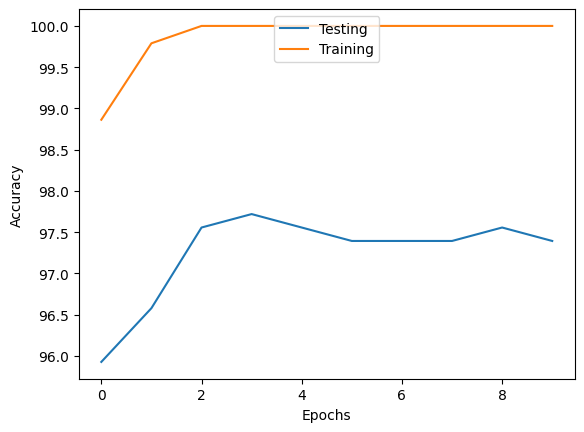

Finished Training


In [ ]:
import matplotlib.pyplot as plt

# Let's build our model
arr = train(10, 0)
print(testAccuracy(tst_loader))
plt.plot(arr[0], label='Testing')
plt.plot(arr[1], label='Training')
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(loc='upper center')
plt.show()
print('Finished Training')


In [ ]:
    cf_matrix = c_matrix(y_true, y_pred)

    df_cm = pd.DataFrame(cf_matrix/len(y_pred), index = ['True NonViable', 'True Viable'],
                        columns = ['Predicted Nonviable', ' Predicted Viable'])
    plt.figure(figsize = (12,7))
    sn.heatmap(df_cm, annot=True)
    plt.show()


NameError: ignored

In [ ]:
c_matrix(test_loader)

NameError: ignored

In [ ]:
# Let's load the model we just created and test the accuracy per label
model2 = model
# path = "/content/drive/MyDrive/Eggs/Prebuilt model.pth"
path = "/content/myFirstModel.pth"
path = "/content/drive/MyDrive/Eggs/Final Model.pth"
model.load_state_dict(torch.load(path))

# Test with batch of images
model.to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))
print("Training:", end=" ")
print(testAccuracy(trn_loader))
print("Test:")
# print(testAccuracy(tst_loader))
testClasses(tst_loader)
print("December Images:")
testClasses(tst2_loader)
# print(testAccuracy(tst2_loader))
cf_matrix(tst2_loader)
# testBatch(model, tst2_loader)






Training: 99.36842105263158
Test:
Accuracy of nonviable : 96 %
Accuracy of viable : 98 %
Total Accuracy: 97 %
December Images:
Accuracy of nonviable : 87 %
Accuracy of viable : 100 %
Total Accuracy: 92 %


NameError: ignored

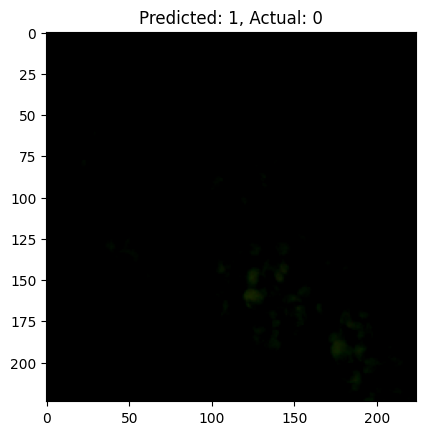

In [ ]:
model.to(torch.device("cpu"))
print_wrong(tst_loader)

# Testing Network

In [ ]:
def imageshow2(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.detach().numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torch.nn.functional as F

from PIL import ImageFile, Image
ImageFile.LOAD_TRUNCATED_IMAGES = True

class Testing_Network(nn.Module):
    def __init__(self, num_classes=2):
        super(Testing_Network, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()

        # self.conv2 = nn.Conv2d(in_channels=12, out_channels=12, kernel_size=3, stride=1, padding=1)
        # self.relu2 = nn.ReLU()

        self.pool = nn.MaxPool2d(kernel_size=2)

        # self.conv3 = nn.Conv2d(in_channels=12, out_channels=24, kernel_size=3, stride=1, padding=1)
        # self.relu3 = nn.ReLU()

        # self.conv4 = nn.Conv2d(in_channels=24, out_channels=24, kernel_size=3, stride=1, padding=1)
        # self.relu4 = nn.ReLU()

        self.fc = nn.Linear(in_features=112 * 112 * 3, out_features=num_classes)

    def forward(self, input):
        output = self.conv1(input)
        output = self.relu1(output)

        # imageshow2(output)

        # output = self.conv2(output)
        # output = self.relu2(output)

        output = self.pool(output)
        imageshow2(output)

        # imageshow(torchvision.utils.make_grid(output))
        # output = self.conv3(output)
        # output = self.relu3(output)

        # output = self.conv4(output)
        # output = self.relu4(output)
        # print(output.shape)
        output = output.view(-1, 112 * 112 * 3)

        # imageshow(torchvision.utils.make_grid(output))

        output = self.fc(output)

        return output

# Instantiate a neural network model
testing_model = Testing_Network()

In [ ]:
testing_model.load_state_dict(torch.load(path))

num = 0
for i in range(len(tst_data)):
  if tst_data[i][1] == 0:
    num = i
imageshow2(tst_data[num][0])
print("Actual: "+classes[tst_data[num][1]])
outputs = testing_model(tst_data[num][0])
_, predicted = torch.max(outputs, 1)
print(" Guess: "+classes[predicted[0]])

num = 0
for i in range(len(tst_data)):
  if tst_data[i][1] == 1:
    num = i
imageshow2(tst_data[num][0])
print("Actual: "+classes[tst_data[num][1]])
outputs = testing_model(tst_data[num][0])
_, predicted = torch.max(outputs, 1)
print(" Guess: "+classes[predicted[0]])

RuntimeError: ignored

In [ ]:
testBatch(testing_model)

NameError: ignored